In [22]:
import math
import numpy
import matplotlib.pyplot as plt

# if using a jupyter notebook
%matplotlib inline

# Allows for printing of entire arrays
numpy.set_printoptions(threshold=numpy.inf)

# Definition of DH parameters
d1 = 0.495
d2 = 0.0
d3 = 0.0
d4 = 1.475
d5 = 0.0
d6 = 0.135

a1 = 0.175
a2 = 1.095
a3 = 0.175
a4 = 0.0
a5 = 0.0
a6 = 0.0

alpha1 = -1 * math.pi / 2
alpha2 = 0.0
alpha3 = -1 * math.pi / 2
alpha4 = math.pi / 2
alpha5 = math.pi / 2
alpha6 = 0.0

# 0 - Definição de parâmetros

In [23]:
# Final actuator parameters
# X = red
x_final = 1.58
# Y = green
y_final = 0
# Z = blue
z_final = 1.765

# Final orientation parameters
t4 = numpy.deg2rad(0)
t5 = numpy.deg2rad(0)

# Wrist position parameters
yc = y_final
xc = x_final

# 1 - Cinemática inversa de posição do corpo

In [24]:
# Calculation of theta 1
def theta1(xc,yc):
    return math.atan2(yc, xc)

print(math.degrees(theta1(xc,yc)))

0.0


In [25]:
def theta3(x_final, y_final, z_final, xc, yc):
    s = z_final - d1
    beta = math.sqrt(math.pow(a3,2) + math.pow(d4,2))
    r = math.sqrt(math.pow((x_final - a1)*math.cos(theta1(xc,yc)),2) + math.pow((y_final - a1)*math.sin(theta1(xc,yc)),2))

    D = ( math.pow(r,2) + math.pow(s,2) - math.pow(a2,2) - math.pow(beta,2) )/(2*a2*beta)

    return math.atan2(math.sqrt(1 - math.pow(D,2)), D) - (math.pi / 2) + math.atan2(a3, d4)

print(math.degrees(theta3(x_final, y_final, z_final, xc, yc)))

3.564976857227738


In [26]:
# Calculation of theta 2
# theta2 = (-1 * math.atan2(s,r)) + math.atan2(beta*math.sin(-theta3 - (math.pi / 2) + math.atan2(a3,d4)), a2 + beta*math.cos(-theta3 - (math.pi / 2) + math.atan2(a3,d4))) + (math.pi/2)

# print(math.degrees(theta2))

def theta2 (x_final, y_final, z_final, xc, yc):
    s = z_final - d1
    beta = math.sqrt(math.pow(a3,2) + math.pow(d4,2))
    r = math.sqrt(math.pow((x_final - a1)*math.cos(theta1(xc,yc)),2) + math.pow((y_final - a1)*math.sin(theta1(xc,yc)),2))

    return (-1 * math.atan2(s,r)) + math.atan2(beta*math.sin(-theta3(x_final, y_final, z_final, xc, yc) - (math.pi / 2) + math.atan2(a3,d4)), a2 + beta*math.cos(-theta3(x_final, y_final, z_final, xc, yc) - (math.pi / 2) + math.atan2(a3,d4))) + (math.pi/2)

print(math.degrees(theta2(x_final, y_final, z_final, xc, yc)))

-3.6513269742072993


# 2 = Cinemática inversa de posição do punho

In [27]:
# Definition of the DH matrix
def DH_matrix(theta, d, a, alpha):
    return numpy.array([[math.cos(theta), -1*math.sin(theta)*math.cos(alpha), math.sin(theta)*math.sin(alpha), a*math.cos(theta)],
                        [math.sin(theta), math.cos(theta)*math.cos(alpha), -1*math.cos(theta)*math.sin(alpha), a*math.sin(theta)],
                        [0, math.sin(alpha), math.cos(alpha), d],
                        [0, 0, 0, 1]])

In [28]:
# DH matrix for the first three joints
# DH1 = DH_matrix(theta1, d1, a1, alpha1)
# DH2 = DH_matrix(theta2, d2, a2, alpha2)
# DH3 = DH_matrix(theta3, d3, a3, alpha3)

# DH03 = numpy.dot(numpy.dot(DH1, DH2), DH3)

# orientacao = numpy.array([
#     [1,0,1,0],
#     [0,1,math.tan(t4),0],
#     [0,0,math.tan(t5)*math.sqrt(1+math.tan(t4)**2),0],
#     [0,0,0,1]
# ])

# DH03 = numpy.dot(orientacao, DH03)

# # Round the values of the matrix
# DH03 = numpy.around(DH03, decimals=3)
# DH03

def DH03(t1,t2,t3,t4,t5):
    DH1 = DH_matrix(t1, d1, a1, alpha1)
    DH2 = DH_matrix(t2, d2, a2, alpha2)
    DH3 = DH_matrix(t3, d3, a3, alpha3)

    DH03 = numpy.dot(numpy.dot(DH1, DH2), DH3)

    orientacao = numpy.array([
        [1,0,1,0],
        [0,1,math.tan(t4),0],
        [0,0,math.tan(t5)*math.sqrt(1+math.tan(t4)**2),0],
        [0,0,0,1]
    ])

    DH03 = numpy.dot(orientacao, DH03)

    # Round the values of the matrix
    DH03 = numpy.around(DH03, decimals=3)
    return DH03


In [29]:
# Calculation of theta 5
# theta5 = -(math.atan2(math.sqrt( math.pow(DH03[0,2],2) + math.pow(DH03[1,2],2) ), DH03[2,2]))+ math.pi/2
# print(math.degrees(theta5))

def theta5(DH03):
    return -(math.atan2(math.sqrt( math.pow(DH03[0,2],2) + math.pow(DH03[1,2],2) ), DH03[2,2]))+ math.pi/2

print(math.degrees(theta5(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))))

0.0


In [30]:
# Calculation of theta 4
# theta4 = math.atan2(DH03[1,2],DH03[0,2]) - math.pi

# print(math.degrees(theta4))

def theta4(DH03):
    return math.atan2(DH03[1,2],DH03[0,2]) - math.pi

print(math.degrees(theta4(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))))

0.0


In [31]:
def theta6(DH03=0):
    return 0

print(math.degrees(theta6()))

0.0


In [32]:
print('\u03B8_1 = ', numpy.around(math.degrees(theta1(xc,yc)), decimals=3))
print('\u03B8_2 = ', numpy.around(math.degrees(theta2(x_final, y_final, z_final, xc, yc)), decimals=3))
print('\u03B8_3 = ', numpy.around(math.degrees(theta3(x_final, y_final, z_final, xc, yc)), decimals=3))
print('\u03B8_4 = ', numpy.around(math.degrees(theta4(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))), decimals=3))
print('\u03B8_5 = ', numpy.around(math.degrees(theta5(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))), decimals=3))
print('\u03B8_6 = ', numpy.around(math.degrees(theta6()), decimals=3))

θ_1 =  0.0
θ_2 =  -3.651
θ_3 =  3.565
θ_4 =  0.0
θ_5 =  0.0
θ_6 =  0.0


# 3 - Configuração do motor

In [33]:
print('motors[0].setPosition(', numpy.around(theta1(xc,yc), decimals=3),')')
print('motors[1].setPosition(', numpy.around(theta2(x_final, y_final, z_final, xc, yc), decimals=3),')')
print('motor[s[2].setPosition(', numpy.around(theta3(x_final, y_final, z_final, xc, yc), decimals=3),')')
print('motors[3].setPosition(', numpy.around(theta4(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5)), decimals=3),')')
print('motors[4].setPosition(', numpy.around(theta5(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5)), decimals=3),')')
print('motors[5].setPosition(', numpy.around(theta6(), decimals=3),')')

motors[0].setPosition( 0.0 )
motors[1].setPosition( -0.064 )
motor[s[2].setPosition( 0.062 )
motors[3].setPosition( 0.0 )
motors[4].setPosition( 0.0 )
motors[5].setPosition( 0 )


# 4 - Definição da trajetória

X
[1.4   ,1.4207,1.5292,1.6834,1.7496,1.6631,1.5079,1.4132,1.3999,1.3697,
 1.2483,1.0984,1.054 ,1.1587,1.312 ,1.3924]
Y
[-1.143 ,-1.0652,-0.9495,-0.9671,-1.1112,-1.2722,-1.4103,-1.5236,-1.5618,
 -1.4954,-1.3718,-1.2276,-1.0629,-0.9447,-0.9748,-1.101 ]
Length of X:  16


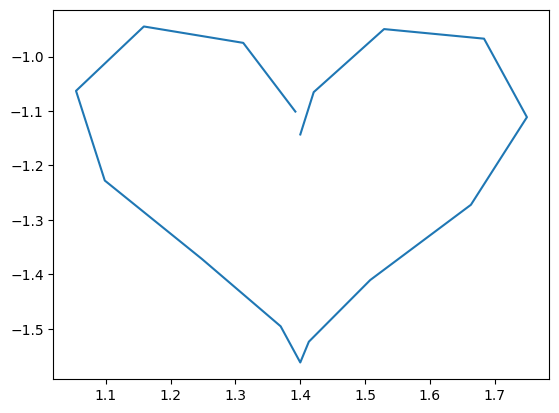

In [34]:
t = numpy.arange(0, 2*numpy.pi, 0.4)

x = 0.35 * numpy.sin(t)**3 + 1.4
y = 0.262 * numpy.cos(t) - 0.127 * numpy.cos(2*t) - 0.052 * numpy.cos(3*t) - 0.026 * numpy.cos(4*t) - 1.2

# Generates constant values for the z axis
z = numpy.full((len(x)), 0.01)

print('X')
print(numpy.array2string(x, precision=4, separator=',', suppress_small=True))
print('Y')
print(numpy.array2string(y, precision=4, separator=',', suppress_small=True))

print('Length of X: ', len(x))

plt.plot(x, y)
plt.show()

In [35]:
# def theta1(xc,yc):
# def theta2 (x_final, y_final, z_final, xc, yc):
# def theta3(x_final, y_final, z_final, xc, yc):
# def theta4(DH03):
# def theta5(DH03):
# def theta6(DH03=0):

motor0 = []
motor1 = []
motor2 = []
motor3 = []
motor4 = []
motor5 = []


for i in range(0, len(x)):
    motor0.append(theta1(x[i],y[i]))
    motor1.append(theta2(x[i], y[i], z[i], x[i], y[i]))
    motor2.append(theta3(x[i], y[i], z[i], x[i], y[i]))

    this_Dh03 = DH03(motor0[i], motor1[i], motor2[i], t4, t5)

    motor3.append(theta4(this_Dh03))
    motor4.append(theta5(this_Dh03))
    motor5.append(theta6())


print('motor0 = ', numpy.array2string(numpy.around(motor0, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor1 = ', numpy.array2string(numpy.around(motor1, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor2 = ', numpy.array2string(numpy.around(motor2, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor3 = ', numpy.array2string(numpy.around(motor3, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor4 = ', numpy.array2string(numpy.around(motor4, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor5 = ', numpy.array2string(numpy.around(motor5, decimals=3), precision=4, separator=',', suppress_small=True))

motor0 =  [-0.685,-0.643,-0.556,-0.521,-0.566,-0.653,-0.752,-0.823,-0.84 ,-0.829,
 -0.832,-0.841,-0.79 ,-0.684,-0.639,-0.669]
motor1 =  [0.648,0.64 ,0.662,0.72 ,0.754,0.742,0.734,0.757,0.77 ,0.742,0.687,0.627,
 0.573,0.56 ,0.599,0.639]
motor2 =  [0.623,0.641,0.595,0.475,0.407,0.431,0.447,0.402,0.376,0.431,0.543,0.667,
 0.786,0.815,0.729,0.644]
motor3 =  [-0.528,-0.5  ,-0.422,-0.376,-0.397,-0.464,-0.539,-0.581,-0.586,-0.593,
 -0.624,-0.665,-0.657,-0.576,-0.516,-0.521]
motor4 =  [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
motor5 =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


# 5 - Planejamento de trajetória

Soma dos tempos:  4.032


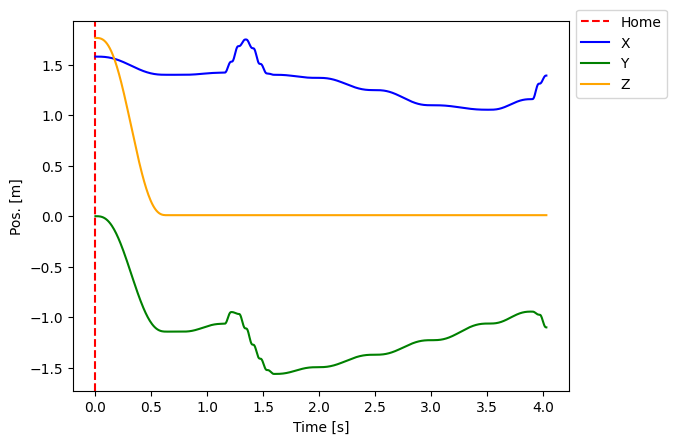

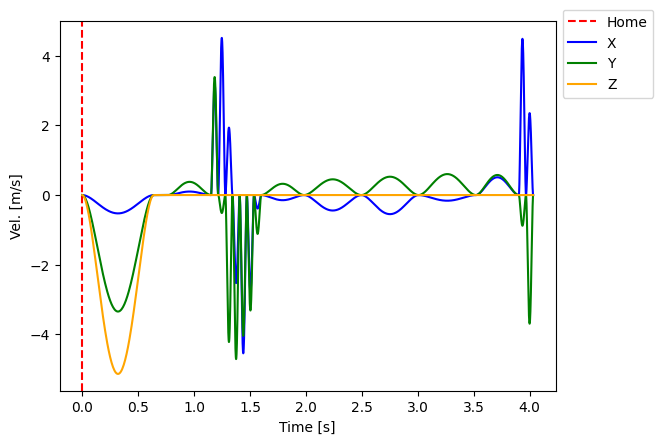

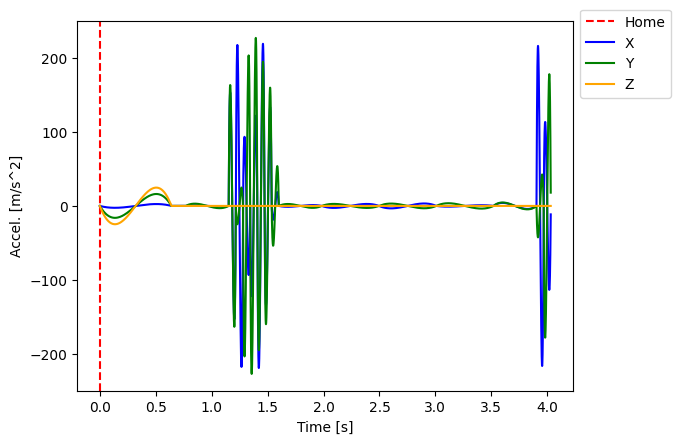

In [36]:
# Task time
tf_ = 0.64

# Columns = Initial position, speed and acceleration
# Rows = x, y and z
home_q = [
    [1.580,0,0],
    [0,0,0],
    [1.765,0,0]
]

# Columns = Final position, speed and acceleration
# Rows = x, y and z
table_q = [
    [1.400,0,0],
    [-1.143,0,0],
    [0.01,0,0]
]

qi = None
qf = None

heart_times = [0.1280000000000001,0.3839999999999999,0.06400000000000006,0.06400000000000006,0.06399999999999983,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.3839999999999999,0.512,0.512,0.512,0.3839999999999999,0.06400000000000006,0.06400000000000006,]
task_times = [tf_] + heart_times

print('Soma dos tempos: ', sum(task_times))

prev_tf = 0.0

final_x = []
final_y_pos = {}
final_y_vel = {}
final_y_acc = {}

name_color = {
  "X": "blue",
  "Y": "green",
  "Z": "orange",
}

for index, tf in enumerate(task_times):
  if qi is None or qf is None:
    qi = home_q
    qf = table_q
  else:
    qi = [
        [qf[0][0],0,0],
        [qf[1][0],0,0],
        [qf[2][0],0,0]
    ]

    qf = [
      [x[index-1],0,0],
      [y[index-1],0,0],
      [table_q[2][0],0,0]
    ]

  # Find initial position indexes

  a_0 = [qi[0][0],qi[1][0],qi[2][0]]
  a_1 = [qi[0][1],qi[1][1],qi[2][1]]
  a_2 = [qi[0][2]/2,qi[1][2]/2,qi[2][2]/2]

  # Define linear system for final position indexes
  LS = [
      [ math.pow(tf,5) , math.pow(tf,4), math.pow(tf,3)],
      [ 5*math.pow(tf,4) , 4*math.pow(tf,3), 3*math.pow(tf,2) ],
      [ 20*math.pow(tf,3) , 12*math.pow(tf,2), 6*tf ]
  ]

  SS = []
  for i in range(0,3):
    SS += [[
      [qf[i][0] - (a_0[i] + a_1[i]*tf + a_2[i]*math.pow(tf,2))],
      [qf[i][1] - (a_1[i] + 2*a_2[i]*tf)],
      [qf[i][2] - (2*a_2[i])]
    ]]

  solutions = {}

  solutions["X"] = numpy.linalg.solve(LS,SS[0])

  solutions["Y"] = numpy.linalg.solve(LS,SS[1])

  solutions["Z"] = numpy.linalg.solve(LS,SS[2])

  a_5 = numpy.around([solutions["X"][0][0], solutions["Y"][0][0], solutions["Z"][0][0]], decimals=3)
  a_4 = numpy.around([solutions["X"][1][0], solutions["Y"][1][0], solutions["Z"][1][0]], decimals=3)
  a_3 = numpy.around([solutions["X"][2][0], solutions["Y"][2][0], solutions["Z"][2][0]], decimals=3)

  timeseries_x = numpy.arange(start=0, stop=tf, step=tf/100)
  final_x += list(timeseries_x + prev_tf)

  for i, name in enumerate(solutions.keys()):
    if name not in final_y_pos.keys():
      final_y_pos[name] = []
    if name not in final_y_vel.keys():
      final_y_vel[name] = []
    if name not in final_y_acc.keys():
      final_y_acc[name] = []
    final_y_pos[name] += [a_5[i]*(j**5)+a_4[i]*(j**4)+a_3[i]*(j**3)+a_2[i]*(j**2)+a_1[i]*(j**1)+a_0[i] for j in timeseries_x]
    final_y_vel[name] += [5*a_5[i]*(j**4)+4*a_4[i]*(j**3)+3*a_3[i]*(j**2)+2*a_2[i]*(j**1)+a_1[i] for j in timeseries_x]
    final_y_acc[name] += [20*a_5[i]*(j**3)+12*a_4[i]*(j**2)+6*a_3[i]*(j**1)+2*a_2[i] for j in timeseries_x]

  prev_tf += tf

plt.figure(1)
plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
plt.xlabel(xlabel="Time [s]")
plt.ylabel(ylabel="Pos. [m]")
for i, name in enumerate(solutions.keys()):
  plt.plot(final_x, final_y_pos[name], label=name, color=name_color[name])
plt.legend(bbox_to_anchor=(1, 1.05))

plt.figure(2)
plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
plt.xlabel(xlabel="Time [s]")
plt.ylabel(ylabel="Vel. [m/s]")
for i, name in enumerate(solutions.keys()):
  plt.plot(final_x, final_y_vel[name], label=name, color=name_color[name])
plt.legend(bbox_to_anchor=(1, 1.05))

plt.figure(3)
plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
plt.xlabel(xlabel="Time [s]")
plt.ylabel(ylabel="Accel. [m/s^2]")
for i, name in enumerate(solutions.keys()):
  plt.plot(final_x, final_y_acc[name], label=name, color=name_color[name])
plt.legend(bbox_to_anchor=(1, 1.05))

plt.show()

In [37]:
x = final_y_pos['X']
y = final_y_pos['Y']
z = final_y_pos['Z']

motor = [0,0,0,0,0,0]

motor[0] = []
motor[1] = []
motor[2] = []
motor[3] = []
motor[4] = []
motor[5] = []


for i in range(0, len(x)):
    motor[0].append(theta1(x[i],y[i]))
    motor[1].append(theta2(x[i], y[i], z[i], x[i], y[i]))
    motor[2].append(theta3(x[i], y[i], z[i], x[i], y[i]))

    this_Dh03 = DH03(motor0[i], motor1[i], motor2[i], t4, t5)

    motor[3].append(theta4(this_Dh03))
    motor[4].append(theta5(this_Dh03))
    motor[5].append(theta6())


# print('motor0 = ', numpy.array2string(numpy.around(motor0, decimals=7), precision=7, separator=',', suppress_small=True))
# print('motor1 = ', numpy.array2string(numpy.around(motor1, decimals=7), precision=7, separator=',', suppress_small=True))
# print('motor2 = ', numpy.array2string(numpy.around(motor2, decimals=7), precision=7, separator=',', suppress_small=True))
# print('motor3 = ', numpy.array2string(numpy.around(motor3, decimals=7), precision=7, separator=',', suppress_small=True))
# print('motor4 = ', numpy.array2string(numpy.around(motor4, decimals=7), precision=7, separator=',', suppress_small=True))
# print('motor5 = ', numpy.array2string(numpy.around(motor5, decimals=7), precision=7, separator=',', suppress_small=True))

motor_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

for i in range(0,6):
    plt.figure(i+4)
    plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
    plt.xlabel(xlabel="Time [s]")
    plt.ylabel(ylabel="Angle [°]")
    # for i, name in enumerate(solutions.keys()):
    #   plt.plot(final_x, final_y_pos[name], label=name, color=name_color[name])
    plt.plot(final_x, motor[i], label="Joint "+str(i), color=motor_colors[i])
    plt.legend(bbox_to_anchor=(1, 1.05))

    # Save image
    plt.savefig("joint_"+str(i)+"_angle.png", dpi=300, bbox_inches='tight')

IndexError: list index out of range

In [ ]:
# # Show position function
# #print("Position function:\n")
# #print("q(t) = ", a_5, "t^5 + ", a_4, "t^4 + ", a_3, "t^3 + ", a_2, "t^2 + ", a_1, "t + ", a_0)

# # Show speed function
# #print("Speed function:\n")
# #print("q'(t) = ", 5*a_5, "t^4 + ", 4*a_4, "t^3 + ", 3*a_3, "t^2 + ", 2*a_2, "t + ", a_1)

# # Show acceleration function
# #print("Acceleration function:\n")
# #print("q''(t) = ", 20*a_5, "t^3 + ", 12*a_4, "t^2 + ", 6*a_3, "t + ", 2*a_2)


# names = ['X', 'Y', 'Z']

# timeseries_x = numpy.arange(start=0, stop=tf, step=tf/100)

# timeseries_y_pos = {}
# timeseries_y_vel = {}
# timeseries_y_acc = {}

# for i, name in enumerate(names):
#   # plt.subplot(311)
#   plt.figure(1)
#   timeseries_y_pos[name] = numpy.array([a_5[i]*(j**5)+a_4[i]*(j**4)+a_3[i]*(j**3)+a_2[i]*(j**2)+a_1[i]*(j**1)+a_0[i] for j in timeseries_x])
#   plt.plot(timeseries_x, timeseries_y_pos[name], label=names[i])
#   plt.axvline(x=timeseries_x[-1], color='purple', linestyle='dashed')

#   # plt.subplot(312)
#   plt.figure(2)
#   timeseries_y_vel[name] = numpy.array([5*a_5[i]*(j**4)+4*a_4[i]*(j**3)+3*a_3[i]*(j**2)+2*a_2[i]*(j**1)+a_1[i] for j in timeseries_x])
#   plt.plot(timeseries_x, timeseries_y_vel[name], label=names[i])
#   plt.axvline(x=timeseries_x[-1], color='purple', linestyle='dashed')

#   # plt.subplot(313)
#   plt.figure(3)
#   timeseries_y_acc[name] = numpy.array([20*a_5[i]*(j**3)+12*a_4[i]*(j**2)+6*a_3[i]*(j**1)+2*a_2[i] for j in timeseries_x])
#   plt.plot(timeseries_x, timeseries_y_acc[name], label=names[i])
#   plt.axvline(x=timeseries_x[-1], color='purple', linestyle='dashed')


# # plt.subplot(311)
# plt.figure(1)
# plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
# plt.xlabel(xlabel="Time [s]")
# plt.ylabel(ylabel="Pos. [m]")

# plt.legend(bbox_to_anchor=(1, 1.05))

# # plt.subplot(312)
# plt.figure(2)
# plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
# plt.xlabel(xlabel="Time [s]")
# plt.ylabel(ylabel="Vel. [m/s]")

# # plt.subplot(313)
# plt.figure(3)
# plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
# plt.xlabel(xlabel="Time [s]")
# plt.ylabel(ylabel="Accel. [m/s^2]")

# plt.show()

In [ ]:
# heart_times = numpy.array([0.1280000000000001, 0.256,0.31999999999999984,0.19200000000000017,0.06400000000000006,0.06399999999999983,0.06400000000000006,0.06400000000000006,0.06399999999999983,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.1280000000000001,0.31999999999999984,0.31999999999999984,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.19199999999999973,0.3839999999999999,0.4480000000000004,0.4479999999999995,0.4480000000000004,0.4479999999999995,0.4480000000000004,0.4480000000000004,0.4479999999999995,0.4480000000000004,0.38399999999999945,0.2560000000000002,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.06400000000000006,0.06400000000000006])

# # Columns = Initial position, speed and acceleration
# # Rows = x, y and z
# original_qi = [
#   [1.580,0,0],
#   [0,0,0],
#   [1.765,0,0]
# ]

# # Columns = Final position, speed and acceleration
# # Rows = x, y and z
# original_qf = [
#     [1.400,0,0],
#     [-1.143,0,0],
#     [0.02,0,0]
# ]

# tf = 0.192
# cum_time = 0
# cum_time += tf

# final_x = []
# final_y_pos = {"X": [], "Y": [], "Z": []}
# final_y_vel = {"X": [], "Y": [], "Z": []}
# final_y_acc = {"X": [], "Y": [], "Z": []}

# for index, tf in enumerate(heart_times):
#   prev_tf = cum_time
#   cum_time += tf
#   # Columns = Initial position, speed and acceleration
#   # Rows = x, y and z
#   qi = qf

#   # Columns = Final position, speed and acceleration
#   # Rows = x, y and z
#   qf = [
#     [x[index],0,0],
#     [y[index],0,0],
#     [original_qf[2][0],0,0]
#   ]

#   a_0 = [qi[0][0],qi[1][0],qi[2][0]]
#   a_1 = [qi[0][1],qi[1][1],qi[2][1]]
#   a_2 = [qi[0][2]/2,qi[1][2]/2,qi[2][2]/2]

#   # Define linear system for final position indexes
#   LS = [
#       [ math.pow(tf,5) , math.pow(tf,4), math.pow(tf,3)],
#       [ 5*math.pow(tf,4) , 4*math.pow(tf,3), 3*math.pow(tf,2) ],
#       [ 20*math.pow(tf,3) , 12*math.pow(tf,2), 6*tf ]
#   ]

#   SS = [
#       0,0,0
#   ]

#   for i in range(0,3):
#     SS[i] = [
#       [qf[i][0] - (a_0[i] + a_1[i]*tf + a_2[i]*math.pow(tf,2))],
#       [qf[i][1] - (a_1[i] + 2*a_2[i]*tf)],
#       [qf[i][2] - (2*a_2[i])]
#     ]

#   solutions = [0,0,0]
#   # print("Solution for X:\n")
#   solutions[0] = numpy.linalg.solve(LS,SS[0])
#   # print(solutions[0])

#   # print("Solution for Y:\n")
#   solutions[1] = numpy.linalg.solve(LS,SS[1])
#   # print(solutions[1])

#   # print("Solution for Z:\n")
#   solutions[2] = numpy.linalg.solve(LS,SS[2])
#   # print(solutions[2])

#   a_5 = numpy.around([solutions[0][0][0], solutions[1][0][0], solutions[2][0][0]], decimals=3)
#   a_4 = numpy.around([solutions[0][1][0], solutions[1][1][0], solutions[2][1][0]], decimals=3)
#   a_3 = numpy.around([solutions[0][2][0], solutions[1][2][0], solutions[2][2][0]], decimals=3)

#   names = ['X', 'Y', 'Z']
#   name_color = {
#       "X": "blue",
#       "Y": "green",
#       "Z": "orange",
#   }

#   timeseries_x = numpy.arange(start=prev_tf, stop=cum_time, step=tf/100)
#   final_x += list(timeseries_x)

#   for i, name in enumerate(names):
#     # plt.figure(1)
#     timeseries_y_pos[name] = numpy.array([a_5[i]*(j**5)+a_4[i]*(j**4)+a_3[i]*(j**3)+a_2[i]*(j**2)+a_1[i]*(j**1)+a_0[i] for j in timeseries_x])
#     final_y_pos[name] += list(timeseries_y_pos[name])
#     # plt.plot(timeseries_x, timeseries_y_pos[name], color=name_color[names[i]])
#     # plt.axvline(x=timeseries_x[-1], color='purple', linestyle='dashed')
#     # if index+1 == len(heart_times):
#     #   plt.plot(timeseries_x, timeseries_y_pos[name], label=names[i], color=name_color[names[i]])

#     # plt.figure(2)
#     timeseries_y_vel[name] = numpy.array([5*a_5[i]*(j**4)+4*a_4[i]*(j**3)+3*a_3[i]*(j**2)+2*a_2[i]*(j**1)+a_1[i] for j in timeseries_x])
#     final_y_vel[name] += list(timeseries_y_vel[name])
#     # plt.plot(timeseries_x, timeseries_y_vel[name], color=name_color[names[i]])
#     # plt.axvline(x=timeseries_x[-1], color='purple', linestyle='dashed')
#     # if index+1 == len(heart_times):
#     #   plt.plot(timeseries_x, timeseries_y_vel[name], label=names[i], color=name_color[names[i]])

#     # plt.figure(3)
#     timeseries_y_acc[name] = numpy.array([20*a_5[i]*(j**3)+12*a_4[i]*(j**2)+6*a_3[i]*(j**1)+2*a_2[i] for j in timeseries_x])
#     final_y_acc[name] += list(timeseries_y_acc[name])
#     # plt.plot(timeseries_x, timeseries_y_acc[name], color=name_color[names[i]])
#     # plt.axvline(x=timeseries_x[-1], color='purple', linestyle='dashed')
#     # if index+1 == len(heart_times):
#     #   plt.plot(timeseries_x, timeseries_y_acc[name], label=names[i], color=name_color[names[i]])


# plt.figure(1)
# plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
# plt.xlabel(xlabel="Time [s]")
# plt.ylabel(ylabel="Pos. [m]")
# for i, name in enumerate(names):
#   plt.plot(final_x, final_y_pos[name], label=name, color=name_color[name])
# plt.legend(bbox_to_anchor=(1, 1.05))

# plt.figure(2)
# plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
# plt.xlabel(xlabel="Time [s]")
# plt.ylabel(ylabel="Vel. [m/s]")
# for i, name in enumerate(names):
#   plt.plot(final_x, final_y_vel[name], label=name, color=name_color[name])
# plt.legend(bbox_to_anchor=(1, 1.05))

# plt.figure(3)
# plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
# plt.xlabel(xlabel="Time [s]")
# plt.ylabel(ylabel="Accel. [m/s^2]")
# for i, name in enumerate(names):
#   plt.plot(final_x, final_y_acc[name], label=name, color=name_color[name])
# plt.legend(bbox_to_anchor=(1, 1.05))

# plt.show()

In [ ]:
# p(t) = a_5 \cdot t^5 + a_4 \cdot t^4 + a_3 \cdot t^3 + a_2 \cdot t^2 + a_1 \cdot t + a_0
# \dot{p}(t) = 5 \cdot a_5 \cdot t^4 + 4 \cdot a_4 \cdot t^3 + 3 \cdot a_3 \cdot t^2 + 2 \cdot a_2 \cdot t + a_1
# \ddot{p}(t) = 20 \cdot a_5 \cdot t^3 + 12 \cdot a_4 \cdot t^2 + 6 \cdot a_3 \cdot t + 2 \cdot a_2

# a_5 \cdot t_f^5 + a_4 \cdot t_f^4 + a_3 \cdott_f^3 &= p_f - p_i
# 5 \cdot a_5 \cdot t_f^4 + 4 \cdot a_4 \cdot t_f^3 + 3 \cdot a_3 \cdot t_f^2 &= \dot{p}_f
# 20 \cdot a_5 \cdot t_f^3 + 12 \cdot a_4 \cdot t_f^2 + 6 \cdot a_3 \cdot t_f &= \ddot{p}_f